# importing libarary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import urllib 
from urllib import request
import requests
import re
import json
import pprint as pp
import random
import seaborn as sns

In [2]:
import os
wd = os.getcwd()

if wd[0] == '/' : # mac os
    
    import platform

    from matplotlib import font_manager, rc
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin' :
        rc('font', family = 'Applegothic')
    elif platform.system() == 'Windows' :
        path = 'c:/Window/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family = font_name)
    else : 
        print('Unknow system') 

    # Mac OS matplotlib 한글 폰트 지원
    
else : 
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    # Windows matplotlib 한글폰트 지원

# reading data

In [3]:
s1 = pd.read_csv('s1_rtTotal.csv', encoding = 'cp949', index_col = 0)
s2 = pd.read_csv('s2_rtTotal.csv', encoding = 'cp949', index_col = 0)

In [4]:
s1_rt01 = pd.read_csv('s1_rt01.csv', encoding = 'cp949', index_col = 0)
s1_rt02 = pd.read_csv('s1_rt02.csv', encoding = 'cp949', index_col = 0)
s1_rt03 = pd.read_csv('s1_rt03.csv', encoding = 'cp949', index_col = 0)

s2_rt01 = pd.read_csv('s2_rt01.csv', encoding = 'cp949', index_col = 0)
s2_rt02 = pd.read_csv('s2_rt02.csv', encoding = 'cp949', index_col = 0)
s2_rt03 = pd.read_csv('s2_rt03.csv', encoding = 'cp949', index_col = 0)

In [24]:
s1_rtTotal = pd.concat([s1_rt01, s1_rt02, s1_rt03]).reset_index(drop = True)
s2_rtTotal = pd.concat([s2_rt01, s2_rt02, s2_rt03]).reset_index(drop = True)

# plotting

In [27]:
rt_piv = pd.pivot_table(s1_rtTotal, index = ['name', 'date'], values = ['ratio']).reset_index()
debut = s1[s1['final_rank'] < 12].sort_values(by = 'final_rank')

df_debut = []

for i in range(len(debut)) : 
    
    tmp_df = rt_piv[rt_piv['name'] == debut['name'][i]]
    df_debut.append(tmp_df)
    
df_debut = pd.concat(df_debut).reset_index(drop = True)
df_debut.set_index('date', inplace = True) # 인덱스 재설정, 구별 기준으로 변인간 비교하기 위해 재설정

In [31]:
s1_rank01 = df_debut[df_debut['name'] == debut['name'][0]]
s1_rank02 = df_debut[df_debut['name'] == debut['name'][1]]
s1_rank03 = df_debut[df_debut['name'] == debut['name'][2]]
s1_rank04 = df_debut[df_debut['name'] == debut['name'][3]]
s1_rank05 = df_debut[df_debut['name'] == debut['name'][4]]
s1_rank06 = df_debut[df_debut['name'] == debut['name'][5]]
s1_rank07 = df_debut[df_debut['name'] == debut['name'][6]]
s1_rank08 = df_debut[df_debut['name'] == debut['name'][7]]
s1_rank09 = df_debut[df_debut['name'] == debut['name'][8]]
s1_rank10 = df_debut[df_debut['name'] == debut['name'][9]]
s1_rank11 = df_debut[df_debut['name'] == debut['name'][10]]

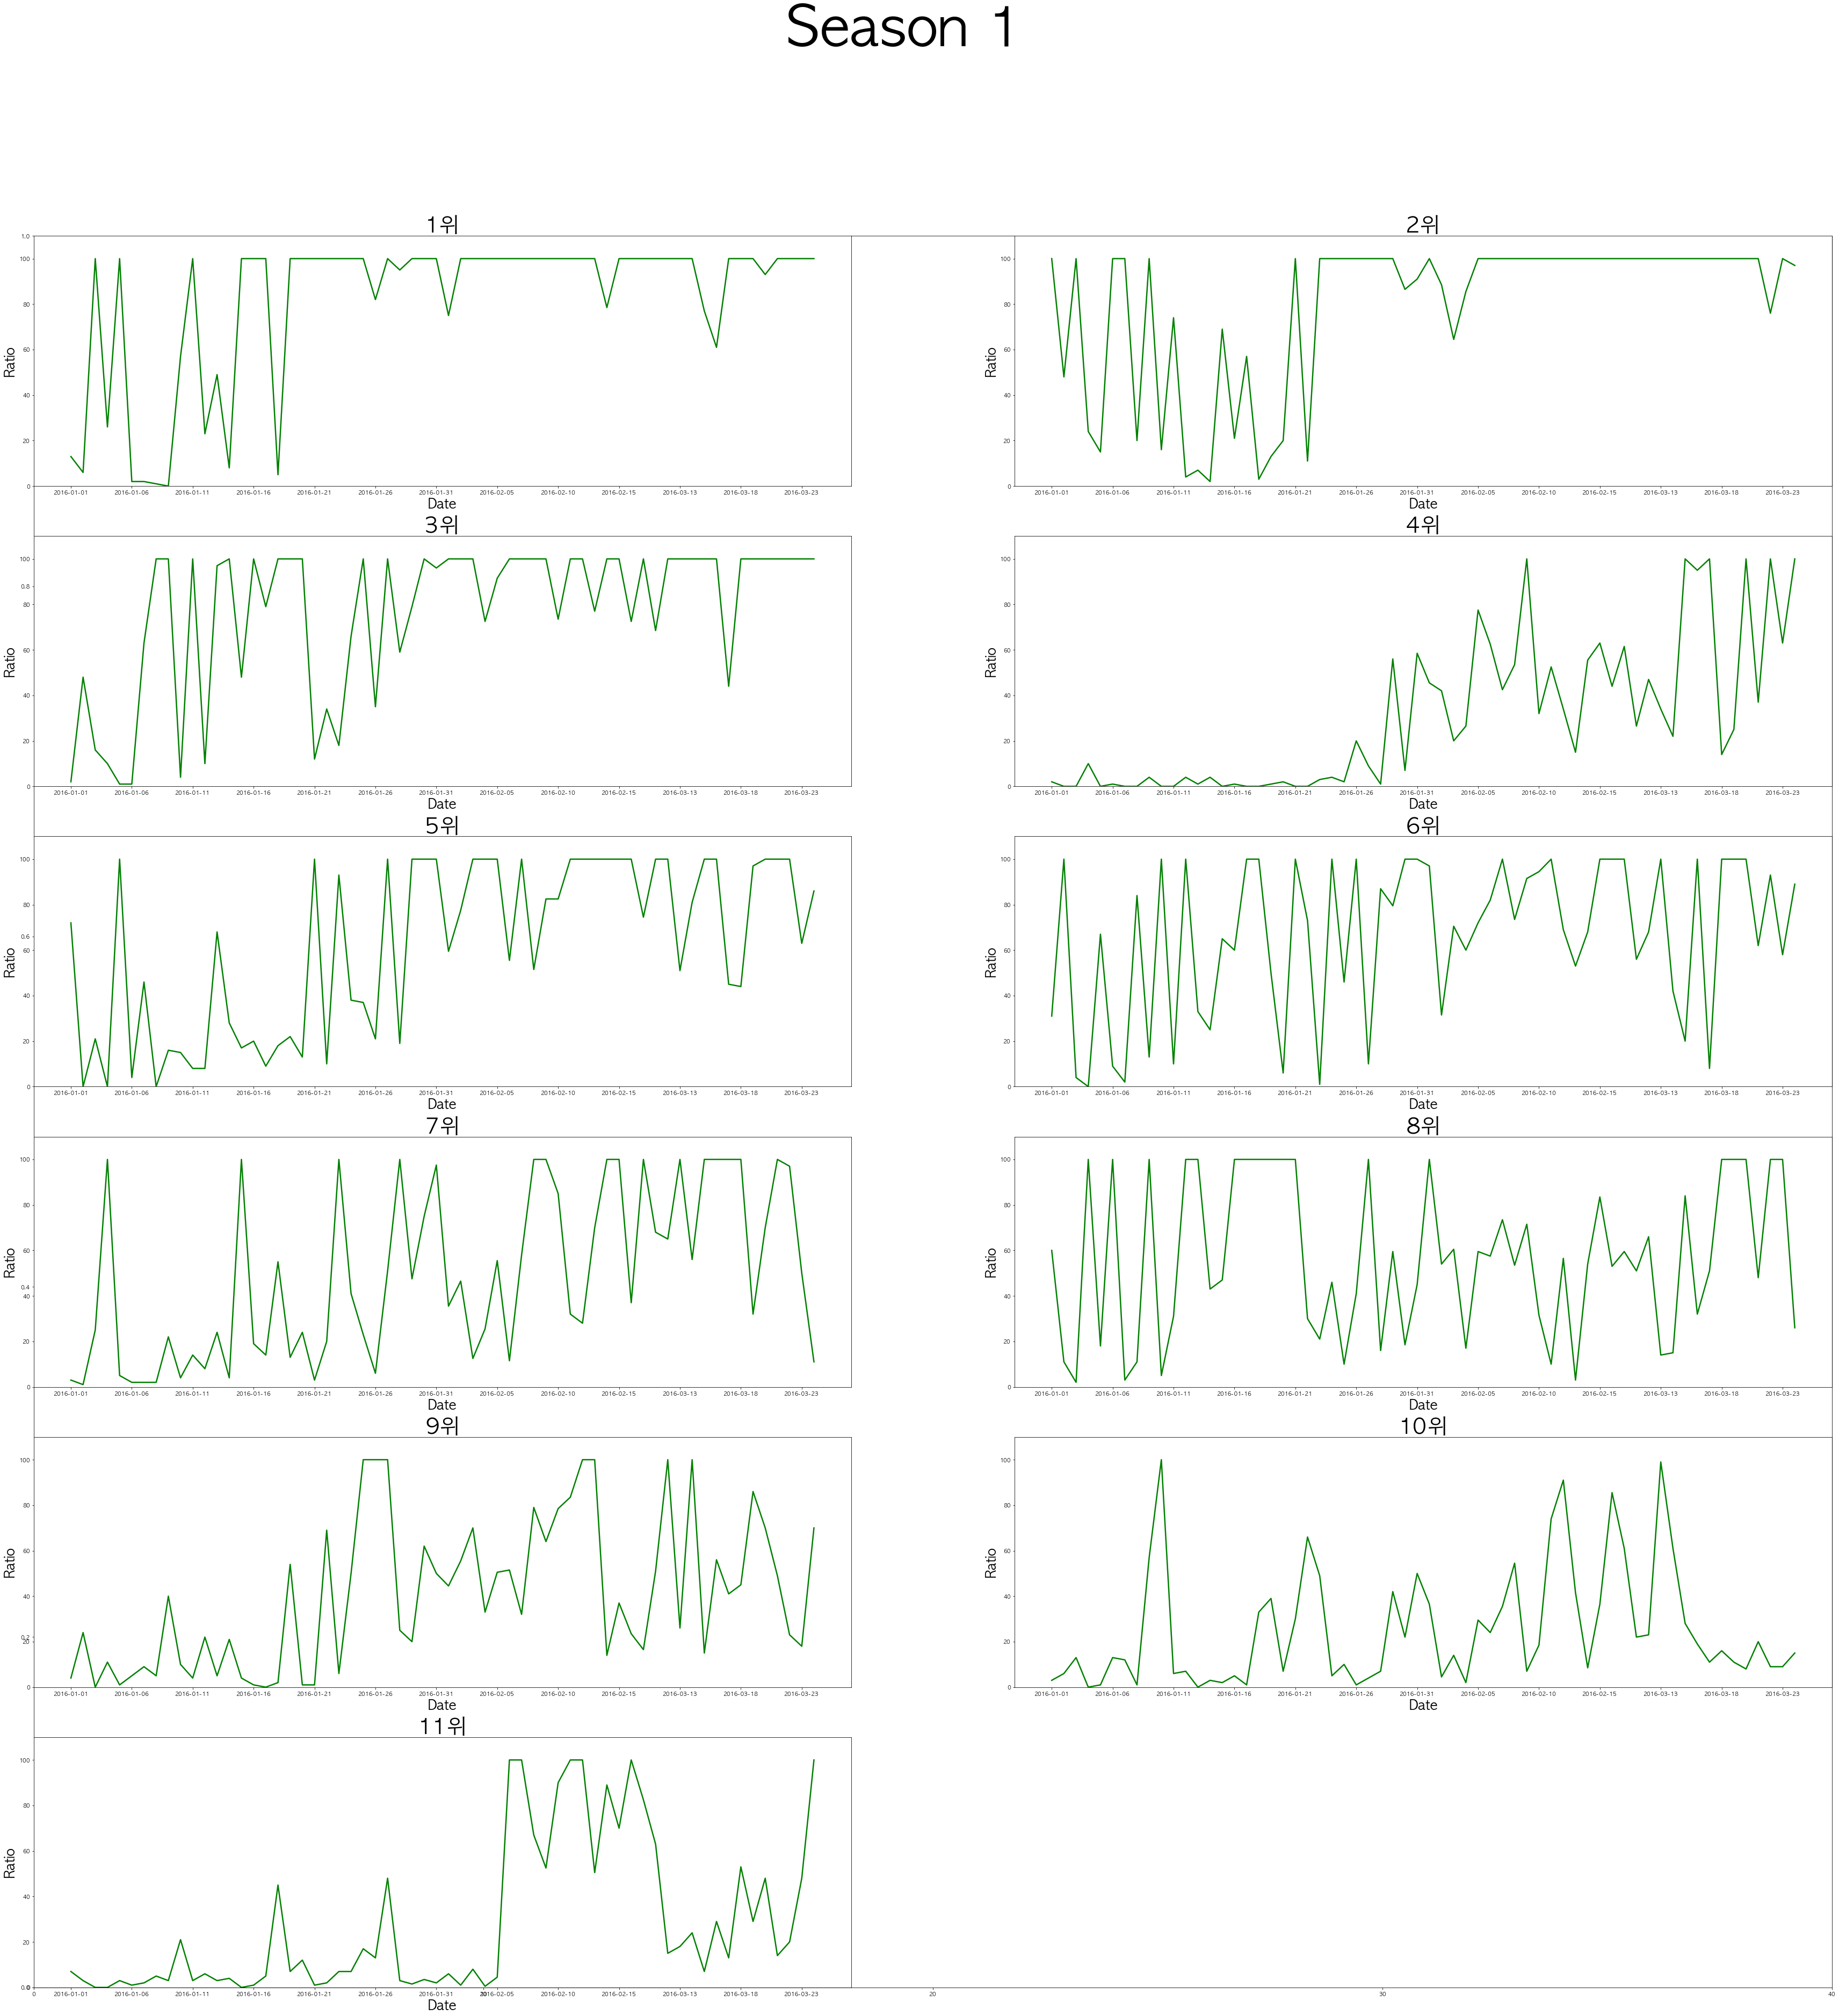

In [33]:
fig = plt.figure(figsize = (60,60))
plt.xticks(np.arange(0, 50, 10))
fig.suptitle('Season 1', fontsize = 100)

# rank01
ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title('1위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank01['ratio'], color = 'g', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(6, 2, 2)
ax1.set_title('2위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank02['ratio'], color = 'g', linewidth = 2.5)

# rank03
ax1 = fig.add_subplot(6, 2, 3)
ax1.set_title('3위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank03.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank03['ratio'], color = 'g', linewidth = 2.5)

# rank04
ax1 = fig.add_subplot(6, 2, 4)
ax1.set_title('4위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank04.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank04['ratio'], color = 'g', linewidth = 2.5)

# rank05
ax1 = fig.add_subplot(6, 2, 5)
ax1.set_title('5위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank05.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank05['ratio'], color = 'g', linewidth = 2.5)

# rank06
ax1 = fig.add_subplot(6, 2, 6)
ax1.set_title('6위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank06.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank06['ratio'], color = 'g', linewidth = 2.5)

# rank07
ax1 = fig.add_subplot(6, 2, 7)
ax1.set_title('7위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank07.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank07['ratio'], color = 'g', linewidth = 2.5)

# rank08
ax1 = fig.add_subplot(6, 2, 8)
ax1.set_title('8위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank08.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank08['ratio'], color = 'g', linewidth = 2.5)

# rank09
ax1 = fig.add_subplot(6, 2, 9)
ax1.set_title('9위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank09.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank09['ratio'], color = 'g', linewidth = 2.5)

# rank010
ax1 = fig.add_subplot(6, 2, 10)
ax1.set_title('10위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank10.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank10['ratio'], color = 'g', linewidth = 2.5)

# rank011
ax1 = fig.add_subplot(6, 2, 11)
ax1.set_title('11위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank11.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank11['ratio'], color = 'g', linewidth = 2.5)


plt.show()

In [34]:
rt_piv = pd.pivot_table(s2_rtTotal, index = ['name', 'date'], values = ['ratio']).reset_index()
debut = s2[s2['final_rank'] < 12].sort_values(by = 'final_rank')

df_debut = []

for i in range(len(debut)) : 
    
    tmp_df = rt_piv[rt_piv['name'] == debut['name'][i]]
    df_debut.append(tmp_df)
    
df_debut = pd.concat(df_debut).reset_index(drop = True)
df_debut.set_index('date', inplace = True) # 인덱스 재설정, 구별 기준으로 변인간 비교하기 위해 재설정

In [35]:
s2_rank01 = df_debut[df_debut['name'] == debut['name'][0]]
s2_rank02 = df_debut[df_debut['name'] == debut['name'][1]]
s2_rank03 = df_debut[df_debut['name'] == debut['name'][2]]
s2_rank04 = df_debut[df_debut['name'] == debut['name'][3]]
s2_rank05 = df_debut[df_debut['name'] == debut['name'][4]]
s2_rank06 = df_debut[df_debut['name'] == debut['name'][5]]
s2_rank07 = df_debut[df_debut['name'] == debut['name'][6]]
s2_rank08 = df_debut[df_debut['name'] == debut['name'][7]]
s2_rank09 = df_debut[df_debut['name'] == debut['name'][8]]
s2_rank10 = df_debut[df_debut['name'] == debut['name'][9]]
s2_rank11 = df_debut[df_debut['name'] == debut['name'][10]]

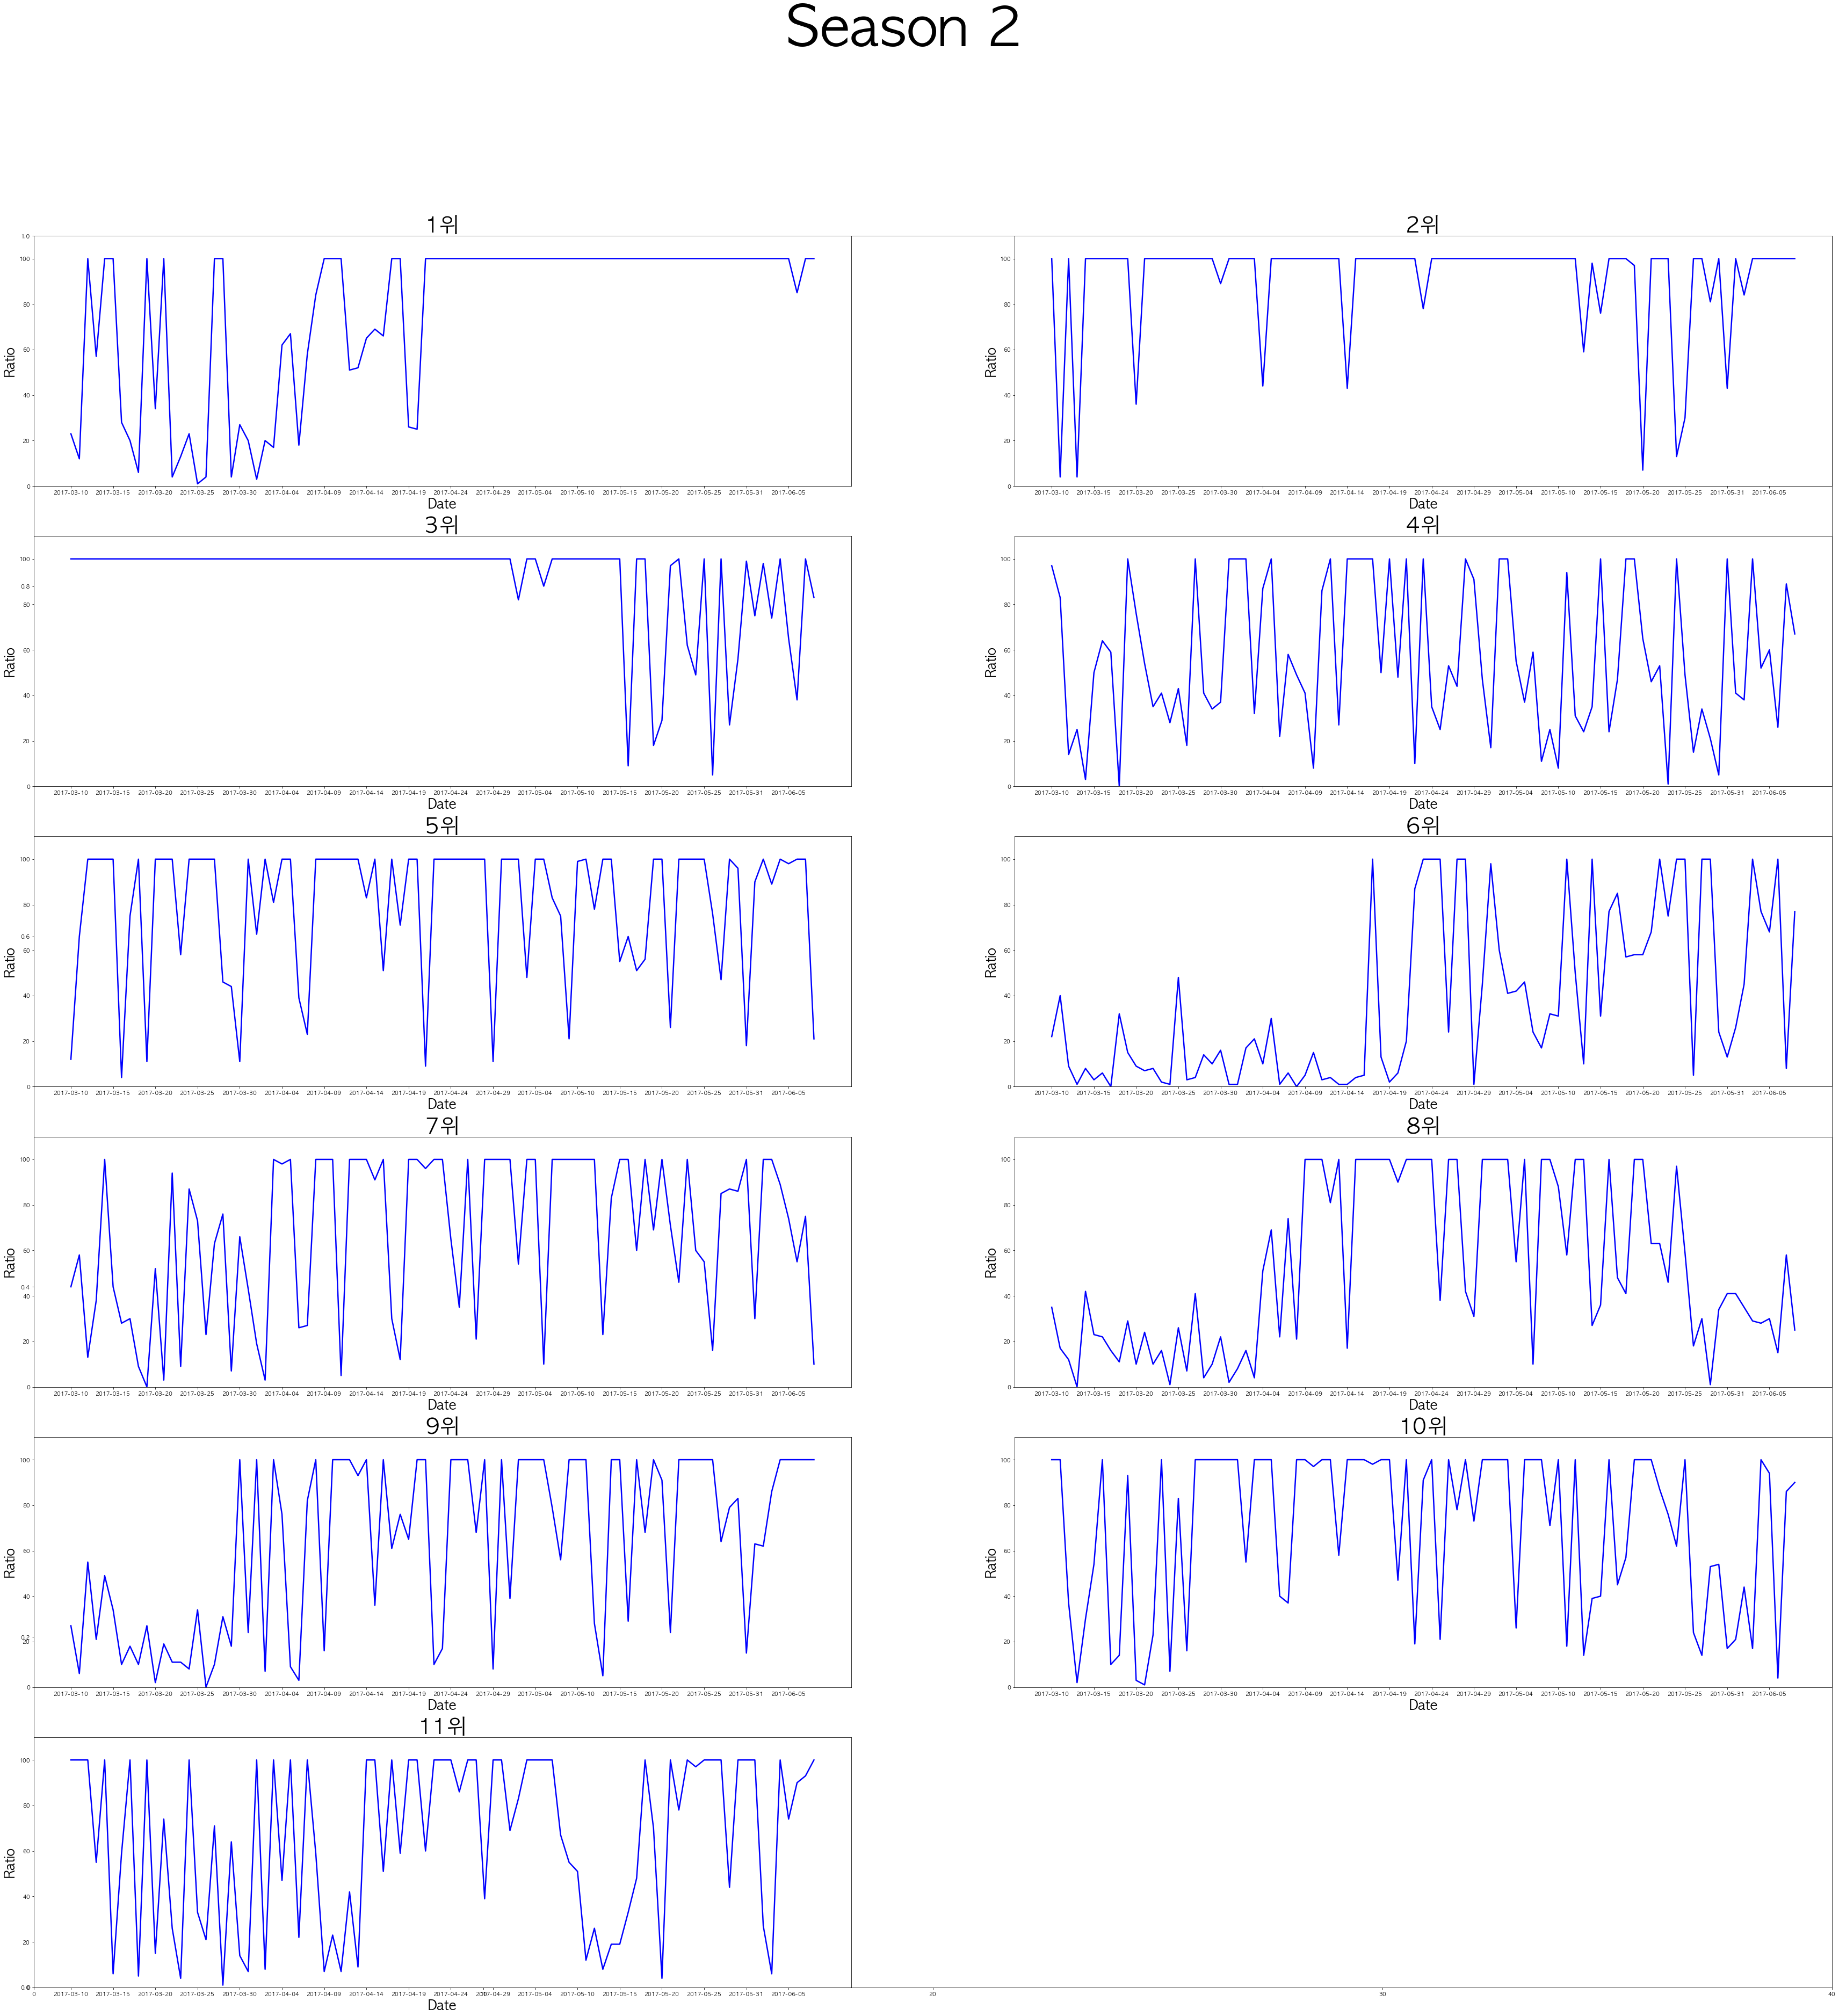

In [36]:
fig = plt.figure(figsize = (60,60))
plt.xticks(np.arange(0, 50, 10))
fig.suptitle('Season 2', fontsize = 100)

# rank01
ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title('1위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank01['ratio'], color = 'b', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(6, 2, 2)
ax1.set_title('2위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank02.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank02['ratio'], color = 'b', linewidth = 2.5)

# rank03
ax1 = fig.add_subplot(6, 2, 3)
ax1.set_title('3위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank03.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank03['ratio'], color = 'b', linewidth = 2.5)

# rank04
ax1 = fig.add_subplot(6, 2, 4)
ax1.set_title('4위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank04.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank04['ratio'], color = 'b', linewidth = 2.5)

# rank05
ax1 = fig.add_subplot(6, 2, 5)
ax1.set_title('5위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank05.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank05['ratio'], color = 'b', linewidth = 2.5)

# rank06
ax1 = fig.add_subplot(6, 2, 6)
ax1.set_title('6위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank06.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank06['ratio'], color = 'b', linewidth = 2.5)

# rank07
ax1 = fig.add_subplot(6, 2, 7)
ax1.set_title('7위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank07.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank07['ratio'], color = 'b', linewidth = 2.5)

# rank08
ax1 = fig.add_subplot(6, 2, 8)
ax1.set_title('8위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank08.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank08['ratio'], color = 'b', linewidth = 2.5)

# rank09
ax1 = fig.add_subplot(6, 2, 9)
ax1.set_title('9위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank09.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank09['ratio'], color = 'b', linewidth = 2.5)

# rank10
ax1 = fig.add_subplot(6, 2, 10)
ax1.set_title('10위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank10.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank10['ratio'], color = 'b', linewidth = 2.5)

# rank11
ax1 = fig.add_subplot(6, 2, 11)
ax1.set_title('11위', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank11.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank11['ratio'], color = 'b', linewidth = 2.5)


plt.show()

In [40]:
len(s1_rank01)

62

In [41]:
len(s2_rank01)

89

In [42]:
len(s2_rank01[27:])

62

In [44]:
# s1, s2 lenth 맞추기

s1_rank01 = s1_rank01.reset_index(drop = True)
s1_rank02 = s1_rank02.reset_index(drop = True)
s1_rank03 = s1_rank03.reset_index(drop = True)
s1_rank04 = s1_rank04.reset_index(drop = True)
s1_rank05 = s1_rank05.reset_index(drop = True)
s1_rank06 = s1_rank06.reset_index(drop = True)
s1_rank07 = s1_rank07.reset_index(drop = True)
s1_rank08 = s1_rank08.reset_index(drop = True)
s1_rank09 = s1_rank09.reset_index(drop = True)
s1_rank10 = s1_rank10.reset_index(drop = True)
s1_rank11 = s1_rank11.reset_index(drop = True)

s2_rank01 = s2_rank01[27:].reset_index(drop = True)
s2_rank02 = s2_rank02[27:].reset_index(drop = True)
s2_rank03 = s2_rank03[27:].reset_index(drop = True)
s2_rank04 = s2_rank04[27:].reset_index(drop = True)
s2_rank05 = s2_rank05[27:].reset_index(drop = True)
s2_rank06 = s2_rank06[27:].reset_index(drop = True)
s2_rank07 = s2_rank07[27:].reset_index(drop = True)
s2_rank08 = s2_rank08[27:].reset_index(drop = True)
s2_rank09 = s2_rank09[27:].reset_index(drop = True)
s2_rank10 = s2_rank10[27:].reset_index(drop = True)
s2_rank11 = s2_rank11[27:].reset_index(drop = True)

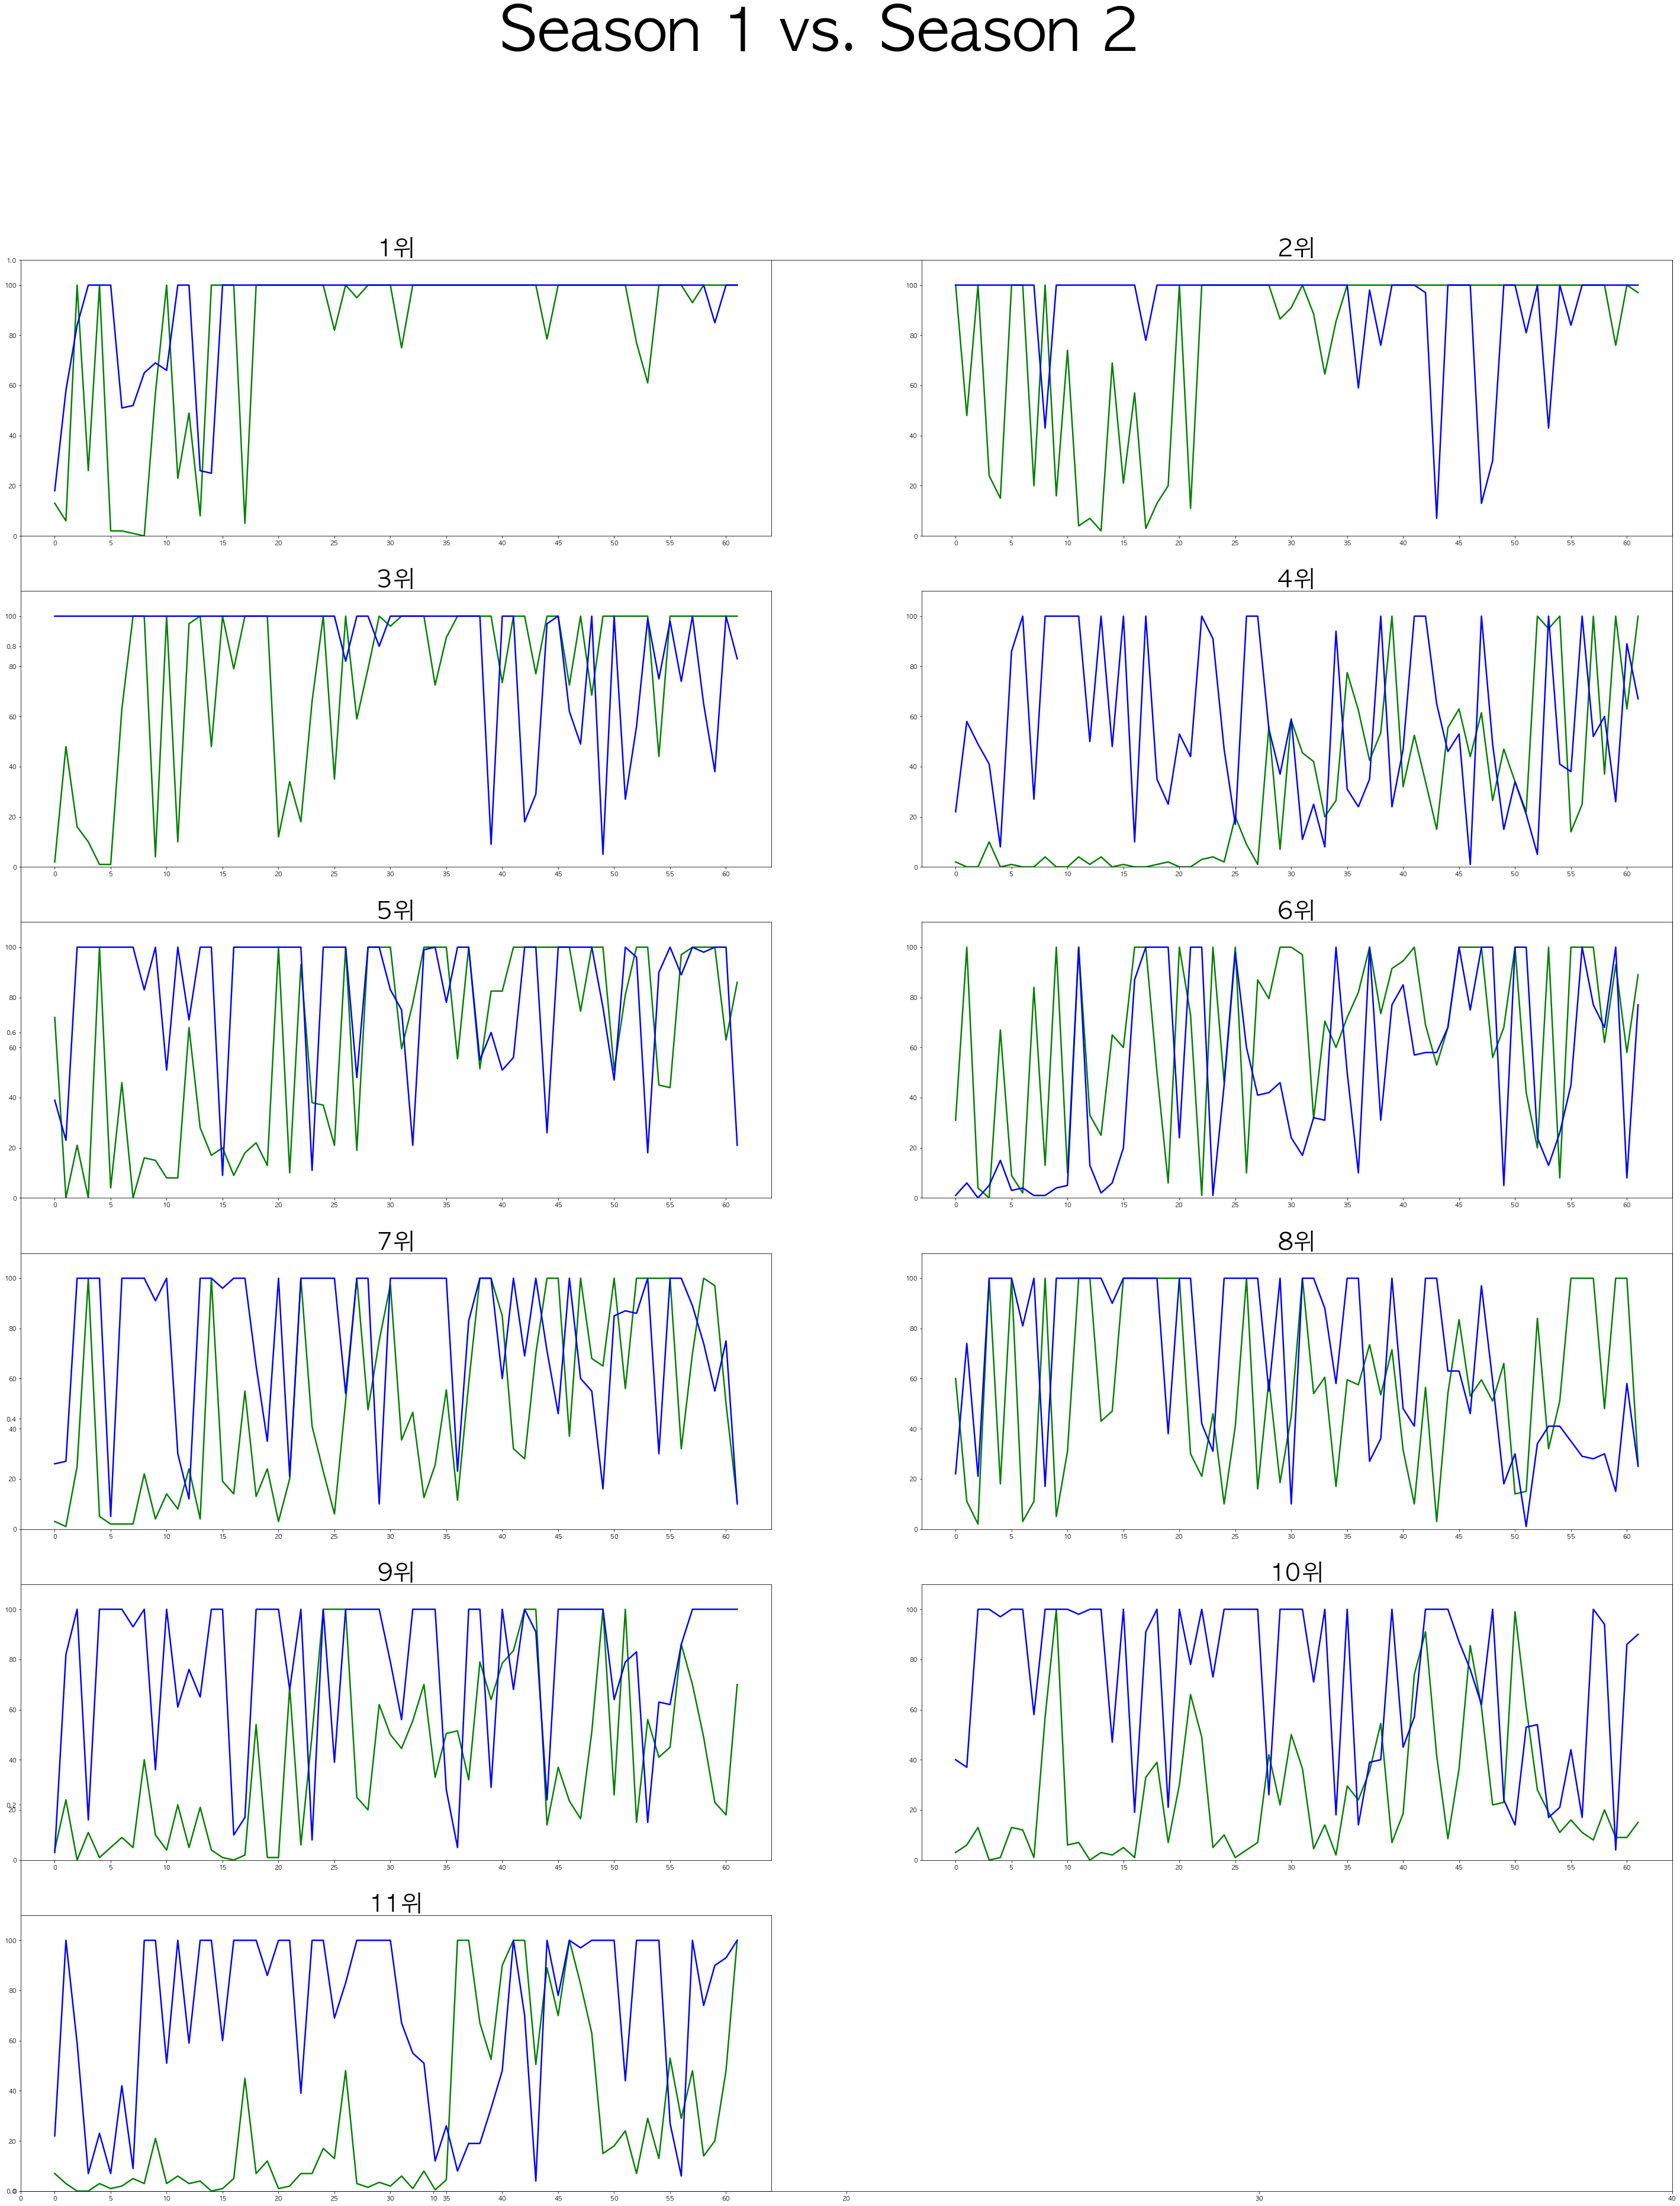

In [45]:
fig = plt.figure(figsize = (50,60))
plt.xticks(np.arange(0, 50, 10))
fig.suptitle('Season 1 vs. Season 2', fontsize = 100)


# rank01
ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title('1위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank01['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank01['ratio'], color = 'b', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(6, 2, 2)
ax1.set_title('2위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank02['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank02['ratio'], color = 'b', linewidth = 2.5)

# rank03
ax1 = fig.add_subplot(6, 2, 3)
ax1.set_title('3위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank03['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank03['ratio'], color = 'b', linewidth = 2.5)

# rank04
ax1 = fig.add_subplot(6, 2, 4)
ax1.set_title('4위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank04['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank04['ratio'], color = 'b', linewidth = 2.5)

# rank05
ax1 = fig.add_subplot(6, 2, 5)
ax1.set_title('5위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank05['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank05['ratio'], color = 'b', linewidth = 2.5)

# rank06
ax1 = fig.add_subplot(6, 2, 6)
ax1.set_title('6위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank06['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank06['ratio'], color = 'b', linewidth = 2.5)

# rank07
ax1 = fig.add_subplot(6, 2, 7)
ax1.set_title('7위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank07['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank07['ratio'], color = 'b', linewidth = 2.5)

# rank08
ax1 = fig.add_subplot(6, 2, 8)
ax1.set_title('8위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank08['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank08['ratio'], color = 'b', linewidth = 2.5)

# rank09
ax1 = fig.add_subplot(6, 2, 9)
ax1.set_title('9위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank09['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank09['ratio'], color = 'b', linewidth = 2.5)

# rank10
ax1 = fig.add_subplot(6, 2, 10)
ax1.set_title('10위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank10['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank10['ratio'], color = 'b', linewidth = 2.5)

# rank11
ax1 = fig.add_subplot(6, 2, 11)
ax1.set_title('11위', size = 40)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 5))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank11['ratio'], color = 'g', linewidth = 2.5)
ax1.plot(s2_rank11['ratio'], color = 'b', linewidth = 2.5)

plt.show()

In [ ]:
## 바 플랏 2개 함께 그리는것 예시

ypos = np.arange(20)
fig = plt.figure(figsize= (16, 8))
ax = fig.add_subplot(121)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom="off", left="off")

rects = plt.barh(ypos, bf_ratio, align='center', height=0.5, color = 'salmon')
plt.yticks(ypos, bf_name)

ax = fig.add_subplot(122)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom="off", left="off")
rects = plt.barh(ypos, af_ratio, align='center', height=0.5, color = 'orange')
plt.yticks(ypos, af_name)


plt.show()